In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

In [3]:
input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):
            correct_data.append([0,1])
        else:
            correct_data.append([1,0])

n_data = len(correct_data)

input_data = np.array(input_data)
correct_data = np.array(correct_data)

In [4]:
n_in = 2
n_mid = 6
n_out = 2

wb_width = 0.01
eta = 0.1
epoch = 101
interval = 10

In [5]:
class MiddleLayer:
    def __init__(self, n_upper, n):

        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)

    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))

    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y

        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)

        self.grad_x = np.dot(delta, self.w.T)

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [6]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)

    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b

        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)

    def backward(self, t):
        delta = self.y - t

        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)

        self.grad_x = np.dot(delta, self.w.T)

    def update(self, eta):
        self.w -= eta*self.grad_w
        self.b -= eta*self.grad_b

In [7]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

In [9]:
sin_data = np.sin(np.pi*X)
for i in range(epoch):

    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    total_error = 0
    x_1 = []
    x_2 = []
    y_1 = []
    y_2 = []

    for idx in index_random:

        x = input_data[idx]
        t = correct_data[idx]

        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)

        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x)

        middle_layer.update(eta)
        output_layer.update(eta)

        if i%interval == 0:

            y = output_layer.y.reshape(-1)

            total_error += -np.sum(t * np.log(y + 1e-7))

            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])

            else:
                x_2.append(x[0])
                y_2.append(x[1])

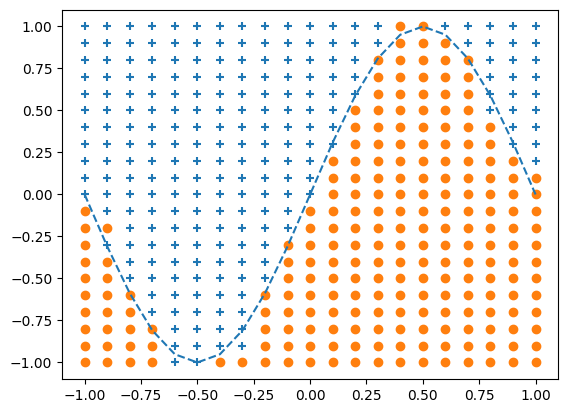

Epoch: 100/ 101 Error: 0.06246938921562744


In [11]:
if i%interval == 0:

  plt.plot(X, sin_data, linestyle = "dashed")
  plt.scatter(x_1, y_1, marker = "+")
  plt.scatter(x_2, y_2, marker = "o")
  plt.show()

  print("Epoch: " + str(i) + "/", str(epoch), "Error: " + str(total_error/n_data))